In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\Windows\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import re

In [2]:
stype = pd.read_csv("screentype.csv")

In [3]:
stype.head(3)

,영화,일반관,특수관,누적관객수
0,명량,17563177,52742,17615919
1,극한직업,16266338,0,16266338
2,신과함께-죄와 벌,14213274,201384,14414658


In [4]:
stype["일반관비율"] = stype["일반관"]/stype["누적관객수"]

In [5]:
stype["특수관비율"] = stype["특수관"]/stype["누적관객수"]

In [6]:
rank = [i for i in range(1, 59)]
stype["순위"] = rank
stype.set_index("순위", inplace=True)

In [7]:
stype.head(3)

,영화,일반관,특수관,누적관객수,일반관비율,특수관비율
순위,,,,,,
1,명량,17563177,52742,17615919,0.997006,0.002994
2,극한직업,16266338,0,16266338,1.000000,0.000000
3,신과함께-죄와 벌,14213274,201384,14414658,0.986029,0.013971


In [8]:
## 특수관 관객수 top5 ##
stype_5 = stype.sort_values("특수관", ascending=False).head(10)

In [9]:
stype_5

,영화,일반관,특수관,누적관객수,일반관비율,특수관비율
순위,,,,,,
8,아바타,6921137,6417726,13338863,0.518870,0.481130
24,아바타: 물의 길,5072801,5729756,10802557,0.469593,0.530407
46,트랜스포머 3,3737420,4047799,7785219,0.480066,0.519934
29,겨울왕국,7918023,2387028,10305051,0.768363,0.231637
26,어벤져스: 에이지 오브 울트론,8590741,1913746,10504487,0.817816,0.182184
11,알라딘,11115370,1682557,12797927,0.868529,0.131471
35,아이언맨 3,7567164,1434515,9001679,0.840639,0.159361
41,탑건: 매버릭,6940385,1255357,8195742,0.846828,0.153172
27,인터스텔라,9117121,1225402,10342523,0.881518,0.118482


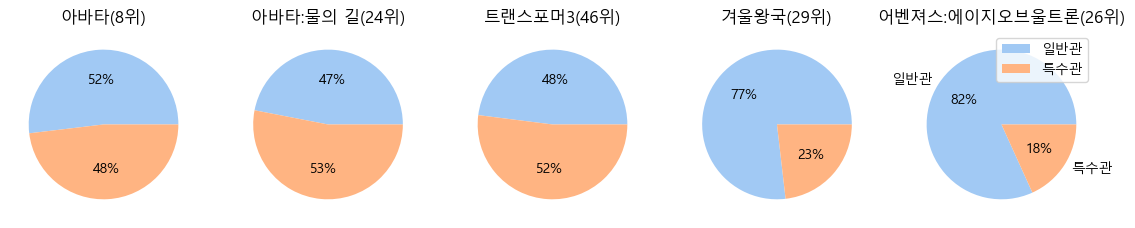

In [69]:
## 58위까지 일반관 특수관 활용 비율 ##
fig = plt.figure(figsize=(14,14)) # 그래프 위치 지정

ax1 = fig.add_subplot(1,5,1)       # 위치 지정
ax2 = fig.add_subplot(1,5,2)
ax3 = fig.add_subplot(1,5,3)
ax4 = fig.add_subplot(1,5,4)
ax5 = fig.add_subplot(1,5,5)

colors = sns.color_palette('pastel')

ax1.pie(stype_5.loc[8,["일반관비율","특수관비율"]], colors = colors, autopct='%.0f%%')
ax2.pie(stype_5.loc[24,["일반관비율","특수관비율"]], colors = colors, autopct='%.0f%%')
ax3.pie(stype_5.loc[46,["일반관비율","특수관비율"]], colors = colors, autopct='%.0f%%')
ax4.pie(stype_5.loc[29,["일반관비율","특수관비율"]], colors = colors, autopct='%.0f%%')
ax5.pie(stype_5.loc[26,["일반관비율","특수관비율"]], labels=["일반관", "특수관"], colors = colors, autopct='%.0f%%')

ax1.set_title("아바타(8위)\n133만")
ax2.set_title("아바타:물의 길(24위)\n108만")
ax3.set_title("트랜스포머3(46위)\n77만")
ax4.set_title("겨울왕국(29위)\n105만")
ax5.set_title("어벤져스:에이지오브울트론(26위)\n")
plt.legend(loc='best')

In [74]:
stype[:29].sort_values("특수관", ascending=False).head(5)

,영화,일반관,특수관,누적관객수,일반관비율,특수관비율
순위,,,,,,
8,아바타,6921137,6417726,13338863,0.518870,0.481130
24,아바타: 물의 길,5072801,5729756,10802557,0.469593,0.530407
29,겨울왕국,7918023,2387028,10305051,0.768363,0.231637
26,어벤져스: 에이지 오브 울트론,8590741,1913746,10504487,0.817816,0.182184
11,알라딘,11115370,1682557,12797927,0.868529,0.131471


In [75]:
stype[29:].sort_values("특수관", ascending=False).head(5)

,영화,일반관,특수관,누적관객수,일반관비율,특수관비율
순위,,,,,,
46,트랜스포머 3,3737420,4047799,7785219,0.480066,0.519934
35,아이언맨 3,7567164,1434515,9001679,0.840639,0.159361
41,탑건: 매버릭,6940385,1255357,8195742,0.846828,0.153172
30,보헤미안 랩소디,8873156,1075230,9948386,0.891919,0.108081
36,캡틴 아메리카: 시빌 워,7869922,808839,8678761,0.906802,0.093198
